# Dog/Cat Convolutional Classificator with TensorFlow

## Импорт библиотек

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt

tf.test.gpu_device_name()

''

## Построение модели

Модель будет дообучаться на модели VGG16, обученной на основе набора данных ImageNet.

In [2]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3)
)

inputs = keras.Input(shape=(5, 5, 512))  
x = keras.layers.Flatten()(inputs)  
x = keras.layers.Dense(256)(x)  
x = keras.layers.Dropout(0.5)(x)  
outputs = keras.layers.Dense(1, activation='sigmoid')(x)  
model = keras.Model(inputs, outputs)

conv_base.summary()
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,277,313 (12.50 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 0 (0.00 B)

На этапе компиляции используем стандартный оптимизатор `RMSprop`. Так как модель заканчивается единственным сигмоидным выходом, используем функцию потерь `binary_crossentropy`.

In [3]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

## Загрузка данных

Для загрузки данных воспользуемся встроенной в Keras функцией `image_dataset_from_directory()`, которая позволит быстро настроить конвейер обработки для автоматического преобразования файлов с изображениями в пакеты готовых тензоров.

In [4]:
train_dataset = keras.utils.image_dataset_from_directory(
    '../data/cats_vs_dogs_small/train',
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = keras.utils.image_dataset_from_directory(
    '../data/cats_vs_dogs_small/validation',
    image_size=(180, 180),
    batch_size=32
)
test_dataset = keras.utils.image_dataset_from_directory(
    '../data/cats_vs_dogs_small/test',
    image_size=(180, 180),
    batch_size=32
)


def get_features_and_labels(dataset):  
    all_features = []  
    all_labels = []  
    for images, labels in dataset:  
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)  
        features = conv_base.predict(preprocessed_images)  
        all_features.append(features)  
        all_labels.append(labels)  
    return np.concatenate(all_features), np.concatenate(all_labels)


train_features, train_labels = get_features_and_labels(train_dataset)  
val_features, val_labels = get_features_and_labels(validation_dataset)  
test_features, test_labels = get_features_and_labels(test_dataset)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━

## Обучение модели с выделением признаков

Создадим обратный вызов, чтобы автоматически остановить обучение и сохранить лучший вариант модели. Далее обучим модель на ранее подготовленных данных.

In [5]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='../models/dogsvscats.keras',
        save_best_only=True,
        monitor='val_loss'
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
		patience=10
    )
]
 
history = model.fit(  
    train_features, 
    train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),  
    callbacks=callbacks
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8739 - loss: 25.9644 - val_accuracy: 0.9540 - val_loss: 6.8615
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9779 - loss: 2.7044 - val_accuracy: 0.9660 - val_loss: 5.8196
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9834 - loss: 2.2800 - val_accuracy: 0.9760 - val_loss: 4.1895
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9895 - loss: 1.6252 - val_accuracy: 0.9730 - val_loss: 4.2818
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9964 - loss: 0.3992 - val_accuracy: 0.9730 - val_loss: 5.7216
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9941 - loss: 1.2827 - val_accuracy: 0.9740 - val_loss: 4.5128
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9963 - loss: 0.5690 - val_accuracy: 0.9750 - val_loss: 4.1141
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9963 - loss: 0.6786 - val_accuracy: 0.9640 - 

## Визуализация обучения с выделением признаков

Построим графики изменения потерь и точности в процессе обучения модели.

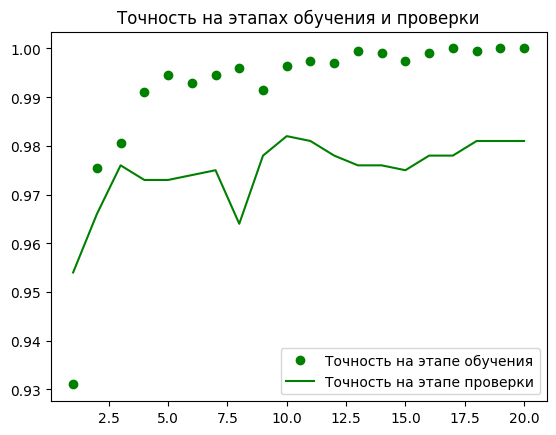

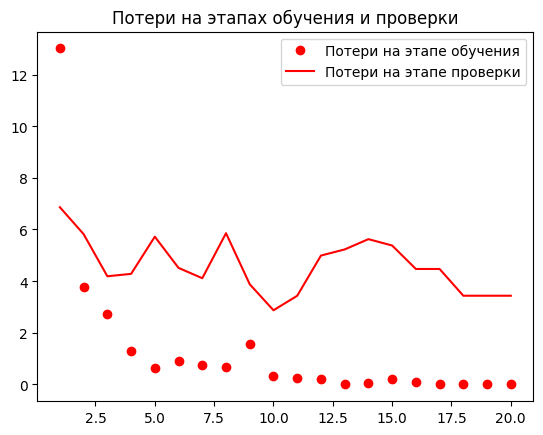

In [6]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'go', label='Точность на этапе обучения')
plt.plot(epochs, val_accuracy, 'g', label='Точность на этапе проверки')
plt.title('Точность на этапах обучения и проверки')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Потери на этапе обучения')
plt.plot(epochs, val_loss, 'r', label='Потери на этапе проверки')
plt.title('Потери на этапах обучения и проверки')
plt.legend()
plt.show()

## Дообучение с заморозкой определенных весов

In [10]:
conv_base.trainable = True 
for layer in conv_base.layers[:-4]: 
	layer.trainable = False

model.compile(
	loss='binary_crossentropy', 
	optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),  # Низкая скорость обучения, чтобы не повредить существующие представления
	metrics=['accuracy']
)

history = model.fit(
	train_features,
    train_labels,
	epochs=30, 
	validation_data=(val_features, val_labels), 
	callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9988 - loss: 0.0345 - val_accuracy: 0.9810 - val_loss: 3.4417
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9810 - val_loss: 3.4417
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9996 - loss: 0.0177 - val_accuracy: 0.9810 - val_loss: 3.4367
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9997 - loss: 0.0060 - val_accuracy: 0.9810 - val_loss: 3.4342
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9991 - loss: 0.0839 - val_accuracy: 0.9810 - val_loss: 3.4259
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9810 - val_loss: 3.4259
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9989 - loss: 0.1165 - val_accuracy: 0.9810 - val_loss: 3.4279
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9999 - loss: 0.0067 - val_accuracy: 0.

## Тестирование модели

In [12]:
test_model = keras.models.load_model('../models/dogsvscats.keras')
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f'Test accuracy: {test_acc:.3f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9728 - loss: 6.3812
Test accuracy: 0.974
